# Test Results from NetLogo Simulation

## Main Changes
- Changed base-infection-risk from 0.006 to 0.06
- Added Home Patch

# Table of Contents
* [File Prepping](#file-prepping)
* [Models](#models)
* [Contact Tracing](#ct)
* [Daily Chart](#dc)
* [Daily Deaths](#dd)
* [Daily Total Cases](#dtc)
* [Daily Total Recoveries](#dtc)
* [Spread of Disease](#sod)
* [Total Vaccinations](#tv)

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

#For Extracting the model from csv
rows_to_keep = [5,6]

# File Prepping <a class="anchor" id="file-prepping"></a>

## Test-2

In [183]:
test2_model = pd.read_csv('Test-2\Test 2 - Galvez\Test 2 Galvez - Spread of Disease.csv', skiprows = lambda x: x not in rows_to_keep)

ct_G2 = pd.read_csv('Test-2\Test 2 - Galvez\Test 2 Galvez - Contact Tracing.csv', skiprows = 21, usecols=[0, 1,5,9,13,17,21])
dc_G2 = pd.read_csv('Test-2\Test 2 - Galvez\Test 2 Galvez - Daily Chart.csv', skiprows = 20, usecols=[0,1,5,9,13,17])
dd_G2 = pd.read_csv('Test-2\Test 2 - Galvez\Test 2 Galvez - Daily Deaths.csv', skiprows = 18, usecols=[0,1,5,9])
dtc_G2 = pd.read_csv('Test-2\Test 2 - Galvez\Test 2 Galvez - Daily total cases.csv', skiprows = 16, usecols=[0,1])
dtr_G2 = pd.read_csv('Test-2\Test 2 - Galvez\Test 2 Galvez - Daily total recoveries.csv', skiprows = 16, usecols=[0,1])
sod_G2 = pd.read_csv('Test-2\Test 2 - Galvez\Test 2 Galvez - Spread of Disease.csv', skiprows = 16, usecols=[0,1])

ct_G2.columns = ['days', 'other', 'workplace', 'grocery', 'commute', 'hospital', 'leisure']
dc_G2.columns = ['days', 'active_cases', 'recoveries', 'deaths', 'exposed', 'vaccinations']
dd_G2.columns = ['days', 'total', 'senior', 'comorbid']
dtc_G2.columns = ['days', 'cases']
dtr_G2.columns = ['days', 'recoveries']
sod_G2.columns = ['ticks', 'spread']


## Test-3

In [184]:
test3_model = pd.read_csv('Test-3\Test 3 - Galvez\Test 3 Galvez - Spread of Disease.csv', skiprows = lambda x: x not in rows_to_keep)

ct_G3 = pd.read_csv('Test-3\Test 3 - Galvez\Test 3 Galvez - Contact Tracing.csv', skiprows = 20, usecols=[0,1,5,9,13,17])
dc_G3 = pd.read_csv('Test-3\Test 3 - Galvez\Test 3 Galvez - Daily Chart.csv', skiprows = 19, usecols=[0,1,5,9,13])
dd_G3 = pd.read_csv('Test-3\Test 3 - Galvez\Test 3 Galvez - Daily Deaths.csv', skiprows = 18, usecols=[0,1,5,9])
dtc_G3 = pd.read_csv('Test-3\Test 3 - Galvez\Test 3 Galvez - Daily total cases.csv', skiprows = 16, usecols=[0,1])
dtr_G3 = pd.read_csv('Test-3\Test 3 - Galvez\Test 3 Galvez - Daily total recoveries.csv', skiprows = 16, usecols=[0,1])
homect_G3 = pd.read_csv('Test-3\Test 3 - Galvez\Test 3 Galvez - Home Contract Tracing.csv', skiprows = 16, usecols=[0,1])
sod_G3 = pd.read_csv('Test-3\Test 3 - Galvez\Test 3 Galvez - Spread of Disease.csv', skiprows = 18, usecols=[0,1,5,9])
tv_G3 = pd.read_csv('Test-3\Test 3 - Galvez\Test 3 Galvez - Total Vaccinations.csv', skiprows = 16, usecols=[0,1])

ct_G3.columns = ['ticks', 'workplace', 'grocery', 'commute', 'hospital', 'leisure']
dc_G3.columns = ['days', 'active_cases', 'recoveries', 'deaths', 'exposed']
dd_G3.columns = ['days', 'total', 'senior', 'comorbid']
dtc_G3.columns = ['days', 'cases']
dtr_G3.columns = ['days', 'recoveries']
homect_G3.columns = ['ticks', 'cases']
sod_G3.columns = ['days', 'asym', 'mild', 'severe']
tv_G3.columns = ['days', 'vaxxed']

## Test-4

In [185]:
test4_model = pd.read_csv('Test-4\Test 4 - Galvez\Test 4 Galvez - Spread of Disease.csv', skiprows = lambda x: x not in rows_to_keep)

ct_G4 = pd.read_csv('Test-4\Test 4 - Galvez\Test 4 Galvez - Contact Tracing.csv', skiprows = 21, usecols=[0,1,5,9,13,17,21])
dc_G4 = pd.read_csv('Test-4\Test 4 - Galvez\Test 4 Galvez - Daily Chart.csv', skiprows = 19, usecols=[0,1,5,9,13])
dd_G4 = pd.read_csv('Test-4\Test 4 - Galvez\Test 4 Galvez - Daily Deaths.csv', skiprows = 18, usecols=[0,1,5,9])
dtc_G4 = pd.read_csv('Test-4\Test 4 - Galvez\Test 4 Galvez - Daily total cases.csv', skiprows = 16, usecols=[0,1])
dtr_G4 = pd.read_csv('Test-4\Test 4 - Galvez\Test 4 Galvez - Daily total recoveries.csv', skiprows = 16, usecols=[0,1])
sod_G4 = pd.read_csv('Test-4\Test 4 - Galvez\Test 4 Galvez - Spread of Disease.csv', skiprows = 18, usecols=[0,1,5,9])
tv_G4 = pd.read_csv('Test-4\Test 4 - Galvez\Test 4 Galvez - Total Vaccinations.csv', skiprows = 16, usecols=[0,1])

ct_G4.columns = ['ticks', 'workplace', 'grocery', 'commute', 'hospital', 'leisure', 'home']
dc_G4.columns = ['days', 'active_cases', 'recoveries', 'deaths', 'exposed']
dd_G4.columns = ['days', 'total', 'senior', 'comorbid']
dtc_G4.columns = ['days', 'cases']
dtr_G4.columns = ['days', 'recoveries']
sod_G4.columns = ['days', 'asym', 'mild', 'severe']
tv_G4.columns = ['days', 'vax']

# Models <a class="anchor" id="models"></a>

In [186]:
test2_model

,commute-area,mask-wear-faceshield-percent,healthcare-area,leisure-area,essential-worker-count,vax-type,total-population,grocery-area,comorbidity-count,base-infection-risk,...,maximum-days,curfew-hours,workplace-area,tick-represents,starting-vax-percent,healthcare-worker-count,alert-level,starting-infected,mask-wear-percent,senior-count
0,3000,80,1500,4500,220,"""mRNA""",938,3000,40,0.006,...,0,4,4500,"""3 Minutes""",50,110,"""Level 2 & 3""",50,90,40


In [187]:
test3_model

,commute-area,mask-wear-faceshield-percent,healthcare-area,leisure-area,essential-worker-count,vax-type,total-population,grocery-area,comorbidity-count,base-infection-risk,...,maximum-days,curfew-hours,workplace-area,tick-represents,starting-vax-percent,healthcare-worker-count,alert-level,mask-wear-percent,starting-infected,senior-count
0,3000,80,1500,4500,220,"""mRNA""",938,3000,40,0.006,...,0,0,4500,"""3 Minutes""",50,110,"""Level 4 & 5""",90,50,40


In [188]:
test4_model

,commute-area,mask-wear-faceshield-percent,healthcare-area,leisure-area,essential-worker-count,vax-type,total-population,grocery-area,comorbidity-count,base-infection-risk,...,maximum-days,curfew-hours,workplace-area,tick-represents,starting-vax-percent,healthcare-worker-count,starting-infected,mask-wear-percent,alert-level,senior-count
0,3000,80,1500,4500,220,"""mRNA""",938,3000,40,0.06,...,0,8,4500,"""3 Minutes""",50,110,50,90,"""Level 4 & 5""",40


# Contact Tracing <a class="anchor" id="ct"></a>

Text(0.5, 1.0, 'Contact Tracing in Ticks Test-3')

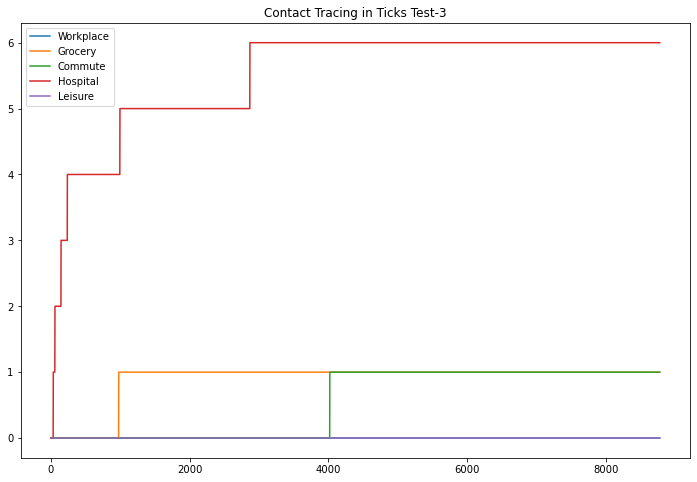

In [189]:
plt.figure(figsize=(12,8))
#Test-3
plt.plot(ct_G3.workplace)
plt.plot(ct_G3.grocery)
plt.plot(ct_G3.commute)
plt.plot(ct_G3.hospital)
plt.plot(ct_G3.leisure)

plt.legend(['Workplace', 'Grocery', 'Commute', 'Hospital', 'Leisure'])
plt.title('Contact Tracing in Ticks Test-3')

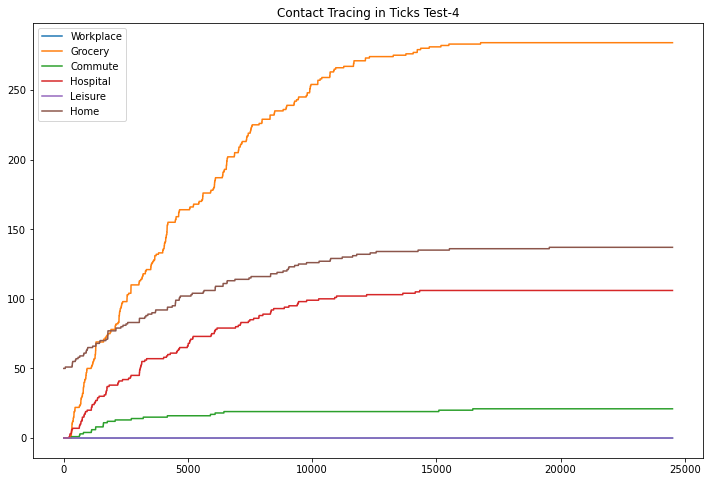

In [190]:
plt.figure(figsize=(12,8))

#Test-4
plt.plot(ct_G4.workplace)
plt.plot(ct_G4.grocery)
plt.plot(ct_G4.commute)
plt.plot(ct_G4.hospital)
plt.plot(ct_G4.leisure)
plt.plot(ct_G4.home)


plt.legend(['Workplace', 'Grocery', 'Commute', 'Hospital', 'Leisure', 'Home'])
plt.title('Contact Tracing in Ticks Test-4')
plt.show()

In [191]:
#Ticks to Days
ctGdays4 = ct_G4.groupby(ct_G4.index // 480).sum()
ctGdays3 = ct_G3.groupby(ct_G3.index // 480).sum()

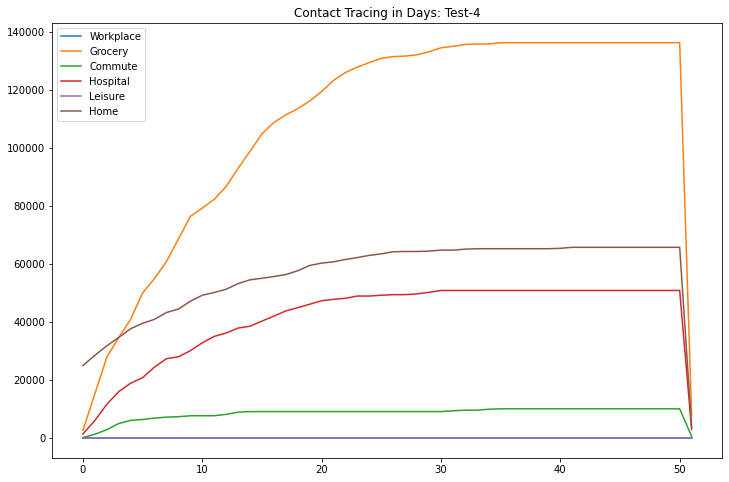

In [192]:
plt.figure(figsize=(12,8))
plt.plot(ctGdays4.workplace)
plt.plot(ctGdays4.grocery)
plt.plot(ctGdays4.commute)
plt.plot(ctGdays4.hospital)
plt.plot(ctGdays4.leisure)
plt.plot(ctGdays4.home)
plt.legend(['Workplace', 'Grocery', 'Commute', 'Hospital', 'Leisure', 'Home'])
plt.title('Contact Tracing in Days: Test-4')
plt.show()

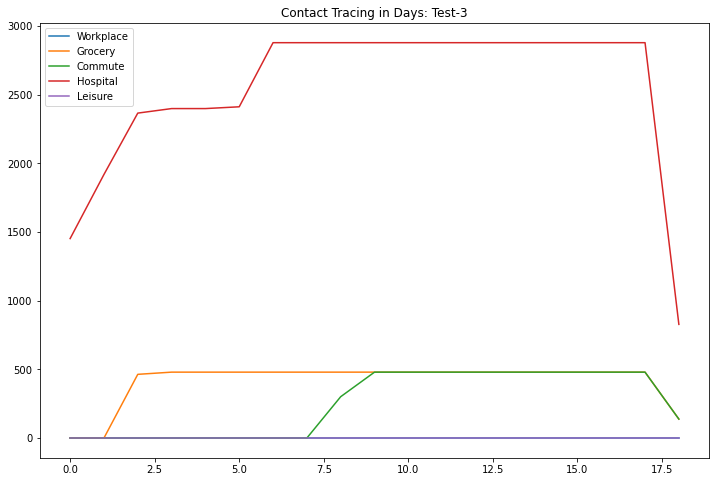

In [193]:
plt.figure(figsize=(12,8))
plt.plot(ctGdays3.workplace)
plt.plot(ctGdays3.grocery)
plt.plot(ctGdays3.commute)
plt.plot(ctGdays3.hospital)
plt.plot(ctGdays3.leisure)
plt.legend(['Workplace', 'Grocery', 'Commute', 'Hospital', 'Leisure'])
plt.title('Contact Tracing in Days: Test-3')
plt.show()

# Daily Chart <a class="anchor" id="dc"></a>

In [194]:
dcGdays4 = dc_G4.groupby(dc_G4.index // 480).sum()

In [195]:
dc_G4.head()

,days,active_cases,recoveries,deaths,exposed
0,0,50,0,0,0
1,1,49,1,1,0
2,1,49,1,1,0
3,1,49,1,1,0
4,1,49,1,1,0


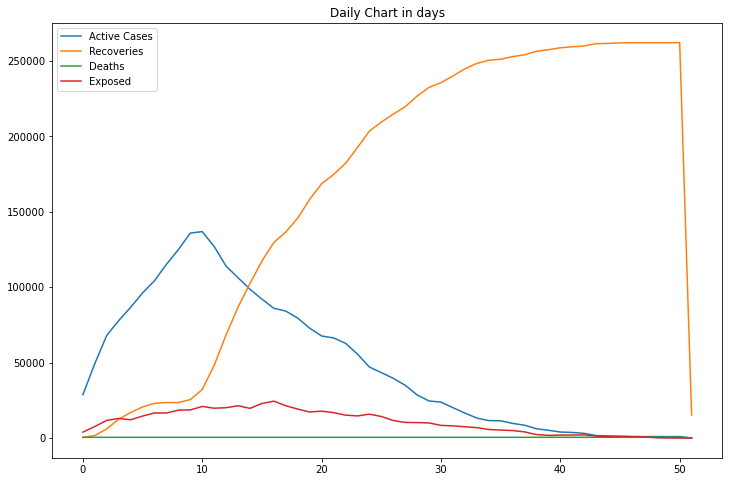

In [196]:
plt.figure(figsize=(12,8))
plt.plot(dcGdays4.active_cases)
plt.plot(dcGdays4.recoveries)
plt.plot(dcGdays4.deaths)
plt.plot(dcGdays4.exposed)
plt.title('Daily Chart in days')
plt.legend(['Active Cases', 'Recoveries', 'Deaths', 'Exposed'])
plt.show()

# Daily Deaths <a class="anchor" id="dd"></a>

In [201]:
ddGdays4 = dd_G4.groupby(dd_G4.index // 480).sum()
ddGdays3 = dd_G3.groupby(dd_G3.index // 480).sum()

In [202]:
ddGdays3.head()

,days,total,senior,comorbid
0,479,0,0,0
1,959,0,0,0
2,1439,0,0,0
3,1919,0,0,0
4,2399,0,0,0


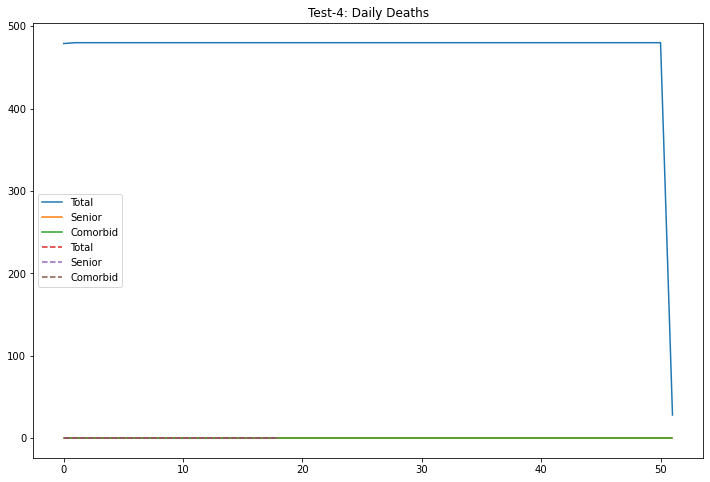

In [205]:
plt.figure(figsize=(12,8))
plt.plot(ddGdays4.total)
plt.plot(ddGdays4.senior)
plt.plot(ddGdays4.comorbid)
plt.plot(ddGdays3.total, '--')
plt.plot(ddGdays3.senior, '--')
plt.plot(ddGdays3.comorbid, '--')
plt.title('Test-4: Daily Deaths')
plt.legend(['Total', 'Senior', 'Comorbid', 'Total', 'Senior', 'Comorbid'])
plt.show()

# Daily Total Cases <a class="anchor" id="dtc"></a>

In [67]:
dtcGdays4 = dtc_G4.groupby(dtc_G4.index // 480).sum()

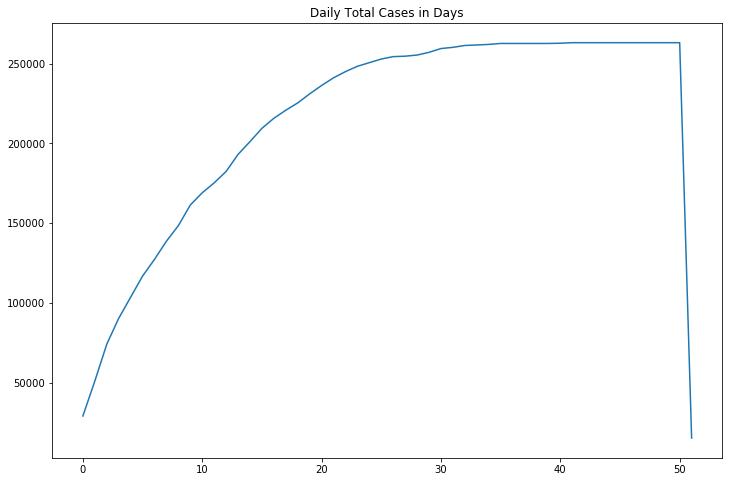

In [69]:
plt.figure(figsize=(12,8))
plt.plot(dtcGdays4.y)
plt.title('Daily Total Cases in Days')
plt.show()

# Daily Total Recoveries <a class="anchor" id="dtr"></a>

In [156]:
dtrGdays4 = dtr_G4.groupby(dtr_G4.index // 480).sum()
dtrGdays3 = dtr_G3.groupby(dtr_G3.index // 480).sum()

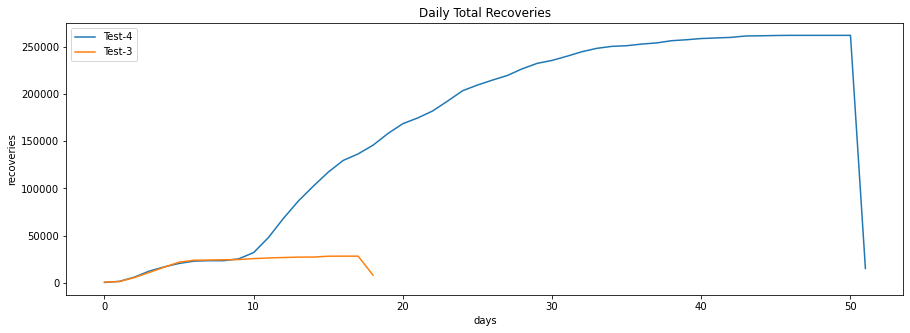

In [161]:
plt.figure(figsize=(15,5))
plt.plot(dtrGdays4.recoveries)
plt.plot(dtrGdays3.recoveries)
plt.title('Daily Total Recoveries')
plt.legend(['Test-4', 'Test-3'])
plt.xlabel('days')
plt.ylabel('recoveries')
plt.show()

# Spread of Disease <a class="anchor" id="sod"></a>

In [124]:
#Conversion of Ticks to Days
sodGdays = sod_G.groupby(sod_G.index // 480).sum()
sodGdays2 = sod_G2.groupby(sod_G2.index // 480).sum()
sodGdays3 = sod_G3.groupby(sod_G3.index // 480).sum()
sodGdays4 = sod_G4.groupby(sod_G4.index // 480).sum()

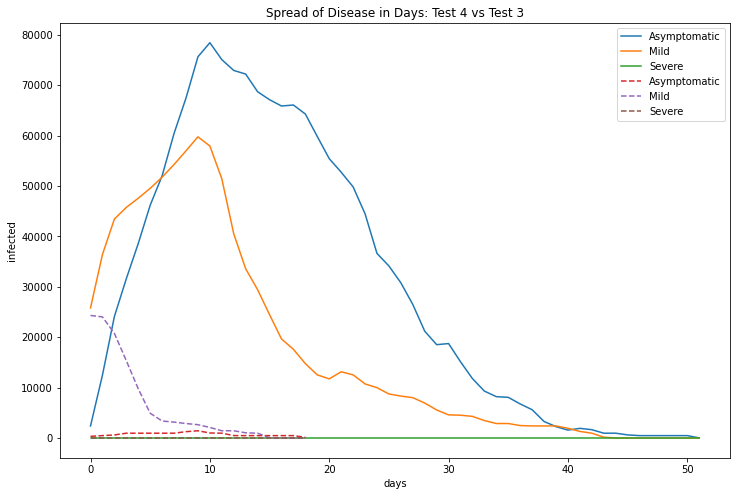

In [206]:
plt.figure(figsize=(12,8))
plt.plot(sodGdays4.asym)
plt.plot(sodGdays4.mild)
plt.plot(sodGdays4.severe)
plt.plot(sodGdays3.asym, '--')
plt.plot(sodGdays3.mild, '--')
plt.plot(sodGdays3.severe, '--')
plt.title('Spread of Disease in Days: Test 4 vs Test 3')
plt.legend(['Asymptomatic', 'Mild', 'Severe', 'Asymptomatic', 'Mild', 'Severe'])
plt.xlabel('days')
plt.ylabel('infected')
plt.show()

# Total Vaccinations <a class="anchor" id="tv"></a>

In [128]:
#Ticks to Days
tvGdays4 = tv_G4.groupby(tv_G4.index // 480).sum()

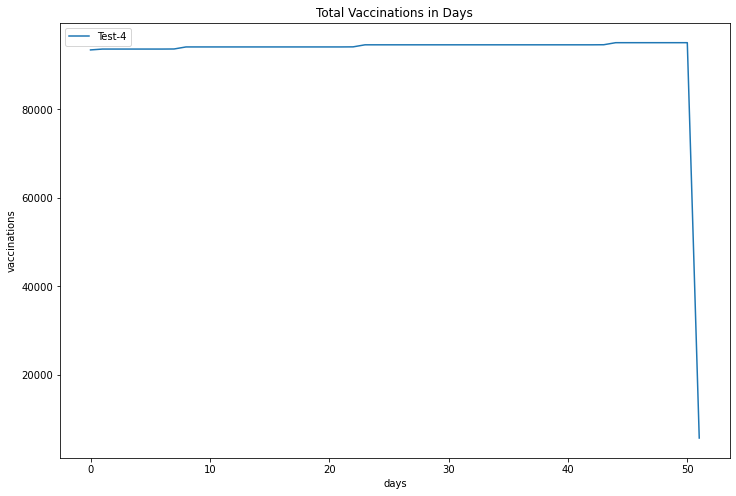

In [130]:
plt.figure(figsize=(12,8))
plt.plot(tvGdays4.vax)
plt.title('Total Vaccinations in Days')
plt.legend(['Test-4'])
plt.xlabel('days')
plt.ylabel('vaccinations')
plt.show()